In [90]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
import joblib
import sklearn.externals
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
import graphviz
%matplotlib inline

In [91]:
# DECISION TREES
# Which split leads to more order in the data ?

In [92]:
# GINI IMPURITY
# The Gini Impurity reaches a value of 0 when all of the data 
# in a leaf are of the same class - this is the best case scenario.

In [93]:
#  If probability of picking a fail is 3/8 and the probability of picking a pass is 5/8
# 1−(3/8)^2−(5/8)^2=0.46875

In [94]:
# The Decision Trees Training Algorithm Overfit the Data
# In order to prevent OVERFITTING :

In [95]:
# Set a maximum depth: For example, you can stop the tree once it has grown to three levels.

In [96]:
# Set a minimum number data points for splits: 
# This means that if a node has less than the minimum, it will not be split further, and will become a leaf.

In [97]:
# Set a minimum number of data points for a leaf: 
# If a split results in a leaf with less than the minimum, do not perform the split. 
# Try the next best split and become a leaf if no split that satisfies the minimum can be found.

In [98]:
# Pruning: Pruning is method of remove splits after the tree is full trained (i.e. you go back and 'prune the tree').

In [99]:
# The TREES can handle NON-NUMERICAL DATA
# The decision tree algorithm can determine nodes that split on non-numeric data.

In [100]:
# The scikit-learn package does not handle categorical data when training decision trees, 
# and we must convert the categorical features to numerical features. 

In [101]:
# Decision trees also do NOT benefit from mean standardization like linear regression and logistic regression can (especially when using regularization), 
# so in general there is no need to to mean standardize our data.
# However, there are many example in which you would still want to mean standardize your data.

In [102]:
os.getcwd()

'/home/bogdan/Desktop/COURSES_STATISTICAL_MACHINE_LEARNING_UCI/course_z4_DATA_ML_PYTHON_at_UCI_for_GITHUB_rewritten'

In [103]:
# TRAINING DATASET and 1-HOT ENCODING

In [104]:
###################################################################

train_df = pd.read_csv("student-mat-train.csv")
train_df.head(2)
# train_df.to_csv(r'train_df_train.csv', index=False)

# zero_grade = train_df.loc[train_df['G3'] > 0,:]
# zero_grade.head(2)
# zero_grade.to_csv(r'zero_grade_train.csv', index=False)

train_df = zero_grade

# performing 1-HOT ENCODING

train_dummies_df = pd.get_dummies(train_df)
train_dummies_df.head()
# train_dummies_df.to_csv(r'train_dummies_df_train.csv', index=False)

###################################################################

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,1,1,2,2,0,5,4,4,1,...,0,1,0,1,0,1,0,1,1,0
1,17,3,3,1,2,0,5,3,3,2,...,0,1,0,1,0,1,0,1,0,1
2,18,4,4,1,3,0,4,3,3,2,...,0,1,0,1,0,1,0,1,1,0
3,16,4,4,1,1,0,5,3,2,1,...,0,1,0,1,0,1,0,1,1,0
4,18,3,3,1,4,0,5,3,3,1,...,1,0,0,1,0,1,0,1,1,0


In [105]:
# TESTING DATASET and 1_HOT ENCODING

In [106]:
###################################################################
test_df = pd.read_csv('student-mat-test.csv')
test_df.head(2)
# test_df.to_csv(r'test_df_test.csv', index=False)

#zero_gradet = test_df.loc[test_df['G3'] > 0,:]
#zero_gradet.head(2)
#zero_gradet.to_csv(r'zero_grade_test.csv', index=False)

#test_df = zero_gradet

# performing 1-HOT ENCODING

test_dummies_df = pd.get_dummies(test_df)
train_dummies_df.head(2)
#test_dummies_df.to_csv(r'test_dummies_df_test.csv', index=False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,1,1,2,2,0,5,4,4,1,...,0,1,0,1,0,1,0,1,1,0
1,17,3,3,1,2,0,5,3,3,2,...,0,1,0,1,0,1,0,1,0,1


In [107]:
# SPLITTING the DATA into the FEATURES(x) and the TARGET(y)

In [108]:
# separate our training data into predictors and predictand
xCols = [col for col in train_dummies_df.columns if col not in ['pass', 'G3']]
X_train = train_dummies_df[xCols]
y_train = train_dummies_df['pass']

# print(X_train)
# print(y_train)

In [109]:
# separate our testing data into predictors and predictand
X_test = test_dummies_df[xCols]
y_test = test_dummies_df['pass']

#print(X_test)
#print(y_test)

In [110]:
# Setting up the DECISION TREE

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X=X_train, y=y_train)

DecisionTreeClassifier(random_state=0)

In [111]:
# Visualizing the DECISION TREE

graphiv_string = export_graphviz(clf, 
                                 out_file=None, 
                                 filled=True, 
                                 rounded=True,
                                 feature_names = X_train.columns)

# Convert the string to an image represenation, set the format to png.
graph = graphviz.Source(graphiv_string, format='png')

# Saving the image in the current working directory.
image_savepath = os.path.join(os.getcwd(), 'image1')
graph.render(image_savepath)

'/home/bogdan/Desktop/COURSES_STATISTICAL_MACHINE_LEARNING_UCI/course_z4_DATA_ML_PYTHON_at_UCI_for_GITHUB_rewritten/image1.png'

In [112]:
# COMPARING the ACCURACY on the TRAINING and TESTING

In [113]:
# Find the accuracy on the training data
train_data_accuracy = accuracy_score(clf.predict(X_train), y_train)
print('The accuracy on the training data is {:.0f}%'.format(train_data_accuracy*100))

The accuracy on the training data is 100%


In [114]:
# Find the accuracy on the testing data
test_data_accuracy = accuracy_score(clf.predict(X_test) , y_test)
print('The accuracy on the testing data is {:.0f}%'.format(test_data_accuracy*100))

The accuracy on the testing data is 59%


In [115]:
# In order to PREVENT OVERFITTING 
# to set up a min_samples_leaf = 45
# and to compute the STEPS that we have written above

In [116]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=45)
clf.fit(X=X_train, y=y_train)

# the DOT format and output as string.
graphiv_string = export_graphviz(clf, 
                                 out_file=None, 
                                 filled=True, 
                                 rounded=True,
                                 feature_names=X_train.columns)

# to convert the string to an image represenation, to set the format to png.
graph = graphviz.Source(graphiv_string, format='png')

# to save the image as 'image2' in the current working directory.
image_savepath = os.path.join(os.getcwd(), 'image2')
graph.render(image_savepath)

# to find the accuracy on the training data
train_data_accuracy = accuracy_score(clf.predict(X_train), y_train)

# to find the accuracy on the testing data
test_data_accuracy = accuracy_score(clf.predict(X_test) , y_test)

print('The accuracy on the training data is {:.0f}%'.format(train_data_accuracy*100))
print('The accuracy on the testing data is {:.0f}%'.format(test_data_accuracy*100))

The accuracy on the training data is 73%
The accuracy on the testing data is 76%


In [117]:
# Setting Hyper Parameters With GridSearchCV

In [118]:
# GridSearchCV allows us to iteratively test different hyper-parameters over a cross-validation loop. 
# If we want to test 10 different values of hyper parameter, 
# it will test each of them over the cross-validation folds. 
# It will then save the the best value of the hyper-parameter and retrain the model with that setting.

In [119]:
# It also allows to search over several different hyper-parameters. 
# For example, we could test 10 values of three different hyper-parameters. 
# It will test every combination (in this case, 1,000 combinations) of the hyper-parameters 
# and find the best values.

In [120]:
# In order to PREVENT OVERFITTING 
# to specify the arguments that we want to be fixed during the TESTING.

clf = DecisionTreeClassifier(random_state=0)

# to make a dictionary of DIFFERENT PARAMETERS and RANGES that we would like to test.

# parameters = {'min_samples_leaf': range(5, 101), 'min_samples_split': [40,80,120]}
# parameters = {'min_samples_leaf': range(5, 101)}
parameters = {'max_depth': range(1, 10)}

# to make the GridSearchCV object, with the model and the paramters, 
# also to specify the number of cv folds. 

# If we want the score on the trianing set to recorded, we set this to true.
gsCV = GridSearchCV(clf, parameters, cv=5, return_train_score=True)

# to train the model. The model will then perform the cross-validation loop
# for every hyper-paramter combination that we want to test.
gsCV.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True)

In [121]:
# In order to explore the HYPER-PARAMETERS

In [122]:
grid_search_results = pd.DataFrame(gsCV.cv_results_)
grid_search_results.head()
# grid_search_results.loc[grid_search_results['rank_test_score']<=10,:].sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001835,0.000404,0.001004,0.000068,1,{'max_depth': 1},0.672414,0.603448,0.724138,0.736842,...,0.694737,0.051463,4,0.747826,0.734783,0.734783,0.735931,0.731602,0.736985,0.005609
1,0.001591,0.000110,0.000959,0.000099,2,{'max_depth': 2},0.724138,0.706897,0.741379,0.684211,...,0.694132,0.044293,6,0.773913,0.769565,0.769565,0.770563,0.753247,0.767371,0.007240
2,0.001533,0.000043,0.000895,0.000056,3,{'max_depth': 3},0.793103,0.655172,0.741379,0.719298,...,0.725650,0.044374,1,0.808696,0.817391,0.826087,0.805195,0.766234,0.804720,0.020564
3,0.001664,0.000065,0.000889,0.000046,4,{'max_depth': 4},0.706897,0.655172,0.775862,0.719298,...,0.715306,0.038434,2,0.847826,0.860870,0.852174,0.826840,0.826840,0.842910,0.013777
4,0.001771,0.000131,0.000853,0.000041,5,{'max_depth': 5},0.775862,0.603448,0.637931,0.719298,...,0.694676,0.064059,5,0.891304,0.900000,0.878261,0.852814,0.852814,0.875039,0.019421


In [123]:
# to INVESTIGATE the BEST MODEL that we have found 

In [124]:
gsCV.best_estimator_
print(gsCV.best_params_)

{'max_depth': 3}


In [125]:
# in order to print the BEST TREE

In [126]:
bestTree = gsCV.best_estimator_

graphiv_string = export_graphviz(bestTree, 
                                 out_file=None, 
                                 filled=True, 
                                 rounded=True,
                                 feature_names=X_train.columns)
graph = graphviz.Source(graphiv_string, format='png')

image_savepath = os.path.join(os.getcwd(), 'image3')
graph.render(image_savepath)

# Find the accuracy on the training data
train_data_accuracy = accuracy_score(bestTree.predict(X_train), y_train)

# Find the accuracy on the testing data
test_data_accuracy = accuracy_score(bestTree.predict(X_test) , y_test)

print('The accuracy on the training data is {:.0f}%'.format(train_data_accuracy*100))
print('The accuracy on the testing data is {:.0f}%'.format(test_data_accuracy*100))

The accuracy on the training data is 82%
The accuracy on the testing data is 62%


In [127]:
# to print the CONFUSION MATRIX of the BEST TREE
cnf_matrix = confusion_matrix(y_test, bestTree.predict(X_test))
print(cnf_matrix)

[[ 4 21]
 [ 9 45]]


In [128]:
# to print the CLASSIFICATION REPORT
print(classification_report(y_test, bestTree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.31      0.16      0.21        25
           1       0.68      0.83      0.75        54

    accuracy                           0.62        79
   macro avg       0.49      0.50      0.48        79
weighted avg       0.56      0.62      0.58        79



In [129]:
# bestTree.predict(X_test)
# bestTree.predict_proba(X_test)

In [130]:
# COMMENTS about the THRESHOLD VALUES
# For both LOGISTIC_REGRESSION and DECISION_TREES, 
# we have used a threshold of 0.5 to determine the PREDICTED CLASS

In [131]:
# in order to display the ROC curve 
predicted_probs = bestTree.predict_proba(X_test)
# print(predicted_probs)

[0.         0.01851852 0.81481481 0.83333333 0.90740741 0.92592593
 1.        ]
[0.   0.16 0.6  0.84 0.92 0.92 1.  ]
[1.94117647 0.94117647 0.84974093 0.52941176 0.4        0.36363636
 0.        ]


Text(0.5, 1.0, 'ROC Curve')

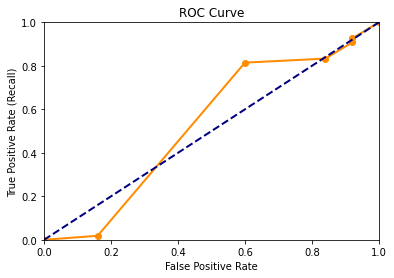

In [132]:
fpr, recall, thresolds = roc_curve(y_test, predicted_probs[:, 1])
print(recall)
print(fpr)
print(thresolds)

fig, ax = plt.subplots(1, 1)
ax.plot(fpr, recall, color='darkorange', lw=2, linestyle='-', marker='o')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC Curve')

In [133]:
# to SAVE and LOAD the MODELS

[0.   0.08 0.08 0.16 0.4  0.84 1.  ]
[0.         0.07407407 0.09259259 0.16666667 0.18518519 0.98148148
 1.        ]
[2.         1.         0.63636364 0.6        0.47058824 0.15025907
 0.05882353]


Text(0.5, 1.0, 'ROC Curve')

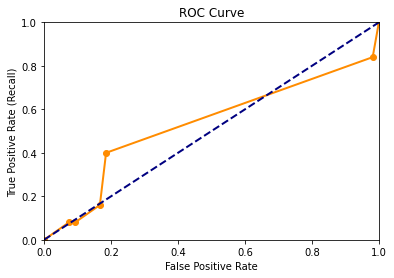

In [134]:
fpr, recall, thresolds = roc_curve(y_test, predicted_probs[:, 0], pos_label=0)
print(recall)
print(fpr)
print(thresolds)

fig, ax = plt.subplots(1, 1)
ax.plot(fpr, recall, color='darkorange', lw=2, linestyle='-', marker='o')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC Curve')

In [135]:
savepath = os.path.join(os.getcwd(), "the_tree_model.pkl")
# print(savepath)
joblib.dump(bestTree, savepath)

loaded_tree = joblib.load(savepath)
loaded_tree.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [136]:
os.getcwd()

'/home/bogdan/Desktop/COURSES_STATISTICAL_MACHINE_LEARNING_UCI/course_z4_DATA_ML_PYTHON_at_UCI_for_GITHUB_rewritten'